In [57]:
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from ipywidgets import widgets
from IPython.display import display

In [58]:
dataset = pd.read_csv('..\dataset\water_potability.csv')
o = widgets.Output()
display(o)
with o:
    print(dataset.describe())

Output()

In [59]:
null_val = dataset.isnull().sum()
null_val

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [60]:
dataset['ph'].fillna(dataset['ph'].median(), inplace=True)
dataset['Sulfate'].fillna(dataset['Sulfate'].median(), inplace=True)
dataset['Trihalomethanes'].fillna(dataset['Trihalomethanes'].median(), inplace=True)
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [61]:
X = dataset.drop(['Potability'], axis=1)
y = dataset['Potability']

In [62]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 35)

In [63]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

0.64

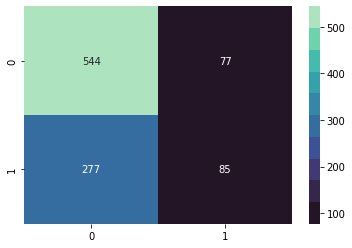

In [64]:
colors= sns.color_palette("mako", 10)
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=colors)
acc = round(accuracy_score(y_valid, y_pred), 3)
acc
